In [33]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model

In [34]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)


In [35]:
BS= 32
TS=(24,24)
train_batch= generator('C:/Users/pritesh kumar singh/Desktop/data/train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('C:/Users/pritesh kumar singh/Desktop/data/valid',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)

Found 1248 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
39 12


In [36]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])


In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 18, 18, 64)       

In [38]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

h =model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)

model.save('C:/Users/pritesh kumar singh/Desktop/cnnCat2.h5', overwrite=True)

Epoch 1/15
39/39 [==============================] - 83s 2s/step - loss: 0.3248 - accuracy: 0.8494 - val_loss: 0.1534 - val_accuracy: 0.9349
Epoch 2/15
39/39 [==============================] - 53s 1s/step - loss: 0.1662 - accuracy: 0.9343 - val_loss: 0.1530 - val_accuracy: 0.9096
Epoch 3/15
39/39 [==============================] - 17s 438ms/step - loss: 0.1231 - accuracy: 0.9551 - val_loss: 0.1478 - val_accuracy: 0.9282
Epoch 4/15
39/39 [==============================] - 17s 446ms/step - loss: 0.0825 - accuracy: 0.9696 - val_loss: 0.0982 - val_accuracy: 0.9707
Epoch 5/15
39/39 [==============================] - 18s 456ms/step - loss: 0.0627 - accuracy: 0.9720 - val_loss: 0.0450 - val_accuracy: 0.9761
Epoch 6/15
39/39 [==============================] - 17s 435ms/step - loss: 0.0633 - accuracy: 0.9784 - val_loss: 0.0854 - val_accuracy: 0.9601
Epoch 7/15
39/39 [==============================] - 16s 422ms/step - loss: 0.0469 - accuracy: 0.9880 - val_loss: 0.0399 - val_accuracy: 0.9734
Epoch

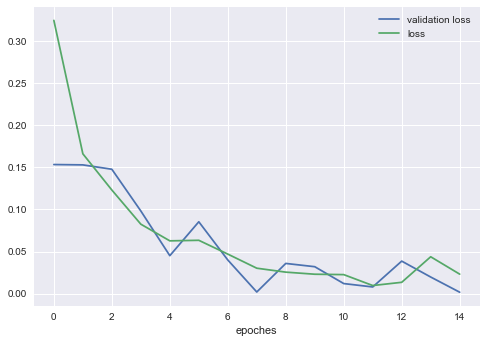

In [39]:
plt.style.use("seaborn")
plt.plot(h.history['val_loss'],label="validation loss")
plt.plot(h.history['loss'],label="loss")
plt.xlabel("epoches")
plt.legend()
plt.show()

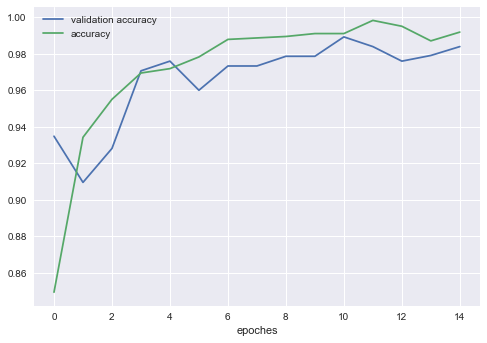

In [40]:
plt.style.use("seaborn")
plt.plot(h.history['val_accuracy'],label="validation accuracy")
plt.plot(h.history['accuracy'],label="accuracy")
plt.xlabel("epoches")
plt.legend()
plt.show()